# Principal Compnent Analysis

In [20]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from plotly.offline import iplot

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop(["class"], axis=1)
Y = df["class"]
X = pd.get_dummies(X, prefix_sep="_")
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis=1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

,PC1,PC2,class
0,-3.284774,1.020020,1
1,-3.969474,-0.856859,0
2,-4.958589,-0.211090,0
3,-3.469997,0.337853,1
4,-2.726565,0.889688,0


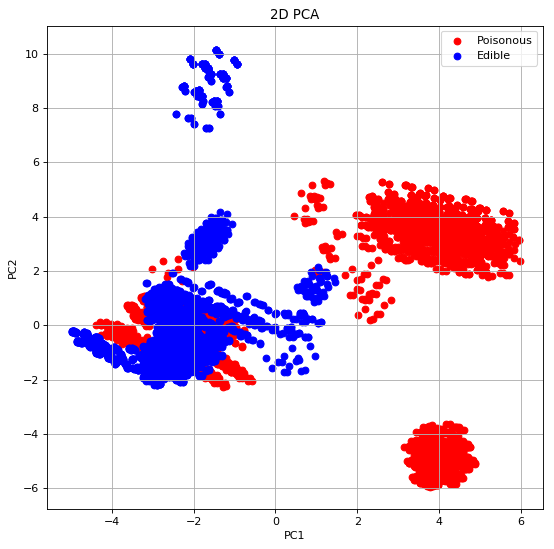

In [7]:
figure(num=None, figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')

classes = [1,0]
colors = ['r','b']
for clas, color in zip (classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'],PCA_df.loc[PCA_df['class'] == clas, 'PC2'] ,  c=color)
    
plt.xlabel ("PC1")
plt.ylabel("PC2")
plt.title ("2D PCA")
plt.legend (['Poisonous', 'Edible'])
plt.grid()

In [8]:
pca.explained_variance_ratio_

array([0.08891017, 0.08125474])

In [16]:
def forest_test (X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.3, random_state=101)
    start = time.process_time()
    trained_forest = RandomForestClassifier (n_estimators=700).fit(X_Train,Y_Train)
    print (time.process_time()-start)
    prediction = trained_forest.predict(X_Test)
    print (confusion_matrix(Y_Test, prediction))
    print (classification_report(Y_Test, prediction))

In [29]:
def complete_test_2D (X, Y, plot_name=""):
    new_df = pd.DataFrame (data = X, columns = ['C1','C2'])
    new_df = pd.concat ([new_df, df['class']], axis=1)
    new_df['class'] = LabelEncoder().fit_transform(new_df['class'])
    forest_test (X,Y)
    data = []
    for clas, col, name in zip((1,0), ['red','darkblue'],['Poisonous','Edible']):
        trace = dict (type='scatter', x = new_df.loc[new_df['class']==clas, 'C1'], y = new_df.loc[new_df['class']==clas, 'C2'], mode='markers', name=name, marker=dict(color=col,size=12,line=dict(color='rgba(217,217,217,0.14)', width=0.5), opacity=0.8))
        data.append (trace)
    layout = dict(title=plot_name + '2D Dimensionality Reduction', xaxis=dict(title='C1', showline=False), yaxis=dict(title='C2', showline=False))
    fig = dict (data=data, layout=layout)
    iplot(fig)

In [36]:
complete_test_2D(X_pca,Y, 'PCA')

6.625
[[1244   30]
 [  94 1070]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1274
           1       0.97      0.92      0.95      1164

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [39]:
var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)
trace1 = dict (type="bar", x=['PC %s' %i for i in range (1,5)], y=var_ratio,name="Individual")
trace2 = dict (type="scatter",x=["PC %s" %i for i in range (1,5)], y=cum_var_ratio, name="Cumulative")
data = [trace1, trace2]
layout = dict (title="Variance Ratio", yaxis=dict(title="in %"), annotations=list([dict(x=1.16,y=1.05,showarrow=False,)]))
fig = dict(data=data, layout=layout)
iplot(fig)


In [34]:
def complete_test_3D (X,Y,plot_name=""):
    new_df = pd.DataFrame (data=X, columns=['C1','C2','C3'])
    new_df = pd.concat ([new_df, df['class']], axis=1)
    new_df['class'] = LabelEncoder().fit_transform(new_df['class'])
    forest_test(X,Y)
    data = []
    for clas, col, name in zip((1,0), ['red','darkblue'],['Poisonous','Edible']):
        trace = dict (type='scatter', x = new_df.loc[new_df['class']==clas, 'C1'], y = new_df.loc[new_df['class']==clas, 'C2'],z=new_df.loc[new_df['class']==clas, 'C3'], mode='markers', name=name, marker=dict(color=col,size=12,line=dict(color='rgba(217,217,217,0.14)', width=0.5), opacity=0.8))
        data.append (trace)
    layout = dict(title=plot_name + '2D Dimensionality Reduction', xaxis=dict(title='C1', showline=False), yaxis=dict(title='C2', showline=False))
    
    fig = dict (data=data, layout=layout)
    iplot(fig)

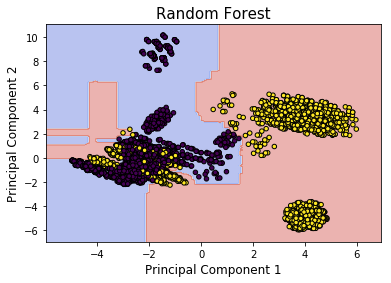

In [41]:
from itertools import product

X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split (X_pca, Y, test_size=0.30, random_state = 101)
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Reduced,Y_Reduced)

x_min, x_max = X_Reduced[:, 0].min() - 1, X_Reduced[:, 0].max() + 1
y_min, y_max = X_Reduced[:, 1].min() - 1, X_Reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = trainedforest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y_Reduced, s=20, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('Random Forest', fontsize = 15)
plt.show()

In [35]:
pca_3 = PCA (n_components=3)
X_pca_3 = pca_3.fit_transform(X)
complete_test_3D (X_pca_3, Y, 'PCA')

6.46875
[[1261   13]
 [  40 1124]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.97      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

